In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2gray

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc, accuracy_score

,genus
id,
520,1.0
3800,1.0
3289,1.0
2695,1.0
4922,1.0


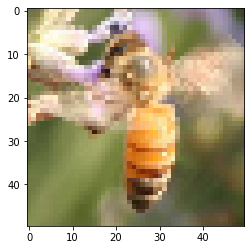

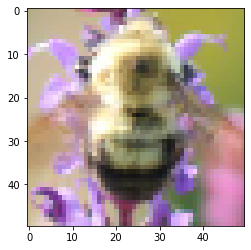

In [2]:
labels = pd.read_csv("labels.csv", index_col=0)

display(labels.head(5))

def get_image(row_id, root="images/"):

    filename = "{}.jpg".format(row_id)
    file_path = os.path.join(root, filename)
    img = Image.open(file_path)
    return np.array(img)

apis_row = labels[labels.genus == 0.0].index[3]

plt.imshow(get_image(apis_row))
plt.show()

bombus_row = labels[labels.genus == 1.0].index[7]

plt.imshow(get_image(bombus_row))
plt.show()

Color bombus image has shape:  (50, 50, 3)
Greyscale bombus image has shape:  (50, 50)


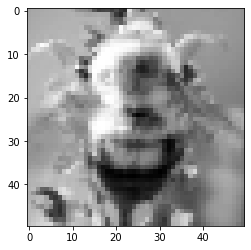

In [3]:
bombus = get_image(bombus_row)

print('Color bombus image has shape: ', bombus.shape)

grey_bombus = rgb2gray(bombus)

plt.imshow(grey_bombus, cmap=mpl.cm.gray)

print('Greyscale bombus image has shape: ', grey_bombus.shape)

(81,)

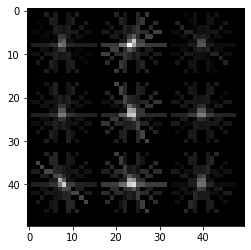

In [4]:
hog_features, hog_image = hog(grey_bombus,visualize=True, block_norm='L2-Hys', pixels_per_cell=(16, 16))

plt.imshow(hog_image, cmap=mpl.cm.gray)

hog_features.shape

In [5]:
def create_features(img):
    
    color_features = bombus.flatten()
    grey_image = rgb2gray(img)
    hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    flat_features = np.hstack([color_features, hog_features])
    
    return flat_features

bombus_features = create_features(bombus)

print(bombus_features.shape)

(7581,)


In [6]:
def create_feature_matrix(label_dataframe):
    features_list = []
    
    for img_id in label_dataframe.index:
        img = get_image(img_id)
        image_features = create_features(img)
        features_list.append(image_features)
        
    feature_matrix = np.array(features_list)
    return feature_matrix


feature_matrix = create_feature_matrix(labels)

In [7]:
print('Feature shape before PCA: ', feature_matrix.shape)
ss = StandardScaler()
bees_stand = ss.fit_transform(feature_matrix)
pca = PCA(n_components=1500)
bees_pca = pca.fit_transform(bees_stand)
print('Feature shape after PCA: ', bees_pca.shape)

Feature shape before PCA:  (1654, 7581)
Feature shape after PCA:  (1654, 1500)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(bees_pca, labels.genus.values, test_size=.3, random_state=42)

pd.Series(y_train).value_counts()

1.0    580
0.0    577
dtype: int64

In [9]:
svm = SVC(kernel = 'linear', probability=True, random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.5995975855130785
